# Costo Médicos

<img src='/work/costo medicos.jfif' width= '750'>

Este conjunto de datos contiene 1338 registros de seguros médicos de Estados Unidos. Los costos médicos individuales facturados por el seguro de salud son los cargos variables objetivo, y el resto de columnas contienen información personal como la edad, el sexo, el estado familiar y si el paciente fuma, entre otras características.

Con estos datos, una aseguradora médica puede desarrollar modelos de precios más precisos, planificar un resultado de seguro particular o administrar grandes carteras.

age: age of primary beneficiary **- EDAD**
sex: insurance contractor gender, female, male **- SEXO**
bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9 **- IMC: Indice de Masa Corporal**
children: Number of children covered by health insurance / Number of dependents **- HIJOS**
smoker: Smoking **- FUMADOR**
region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.**- REGION DE EEUU**
charges: Individual medical costs billed by health insurance **-CARGOS**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('/work/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
print('Este dataframe cuenta con:',df.shape,'datos.')

Este dataframe cuenta con: (1338, 7) datos.


### Análisis de la variable Charges (Cargos)

<AxesSubplot:>

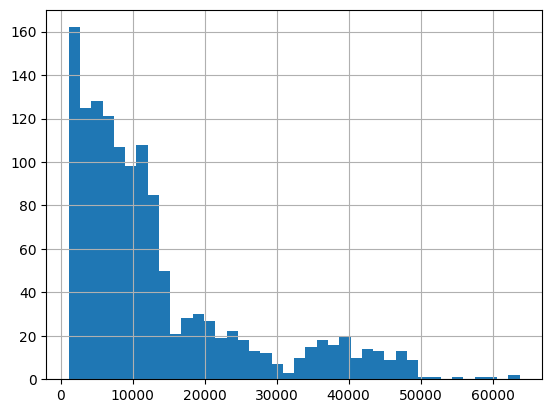

In [4]:
df.charges.hist(bins=40)

Analizando los datos de **charges**, nos encontramos con que la mayoría de los datos se encuentran por debajo de 15,000 dolares,y solo algunos por encima de 50,000 dolares.

In [5]:
df= df[df.charges<50000]
print('Nos quedamos con',df.shape,'datos.')

Nos quedamos con (1331, 7) datos.


### Correlaciones de las variables numéricas 

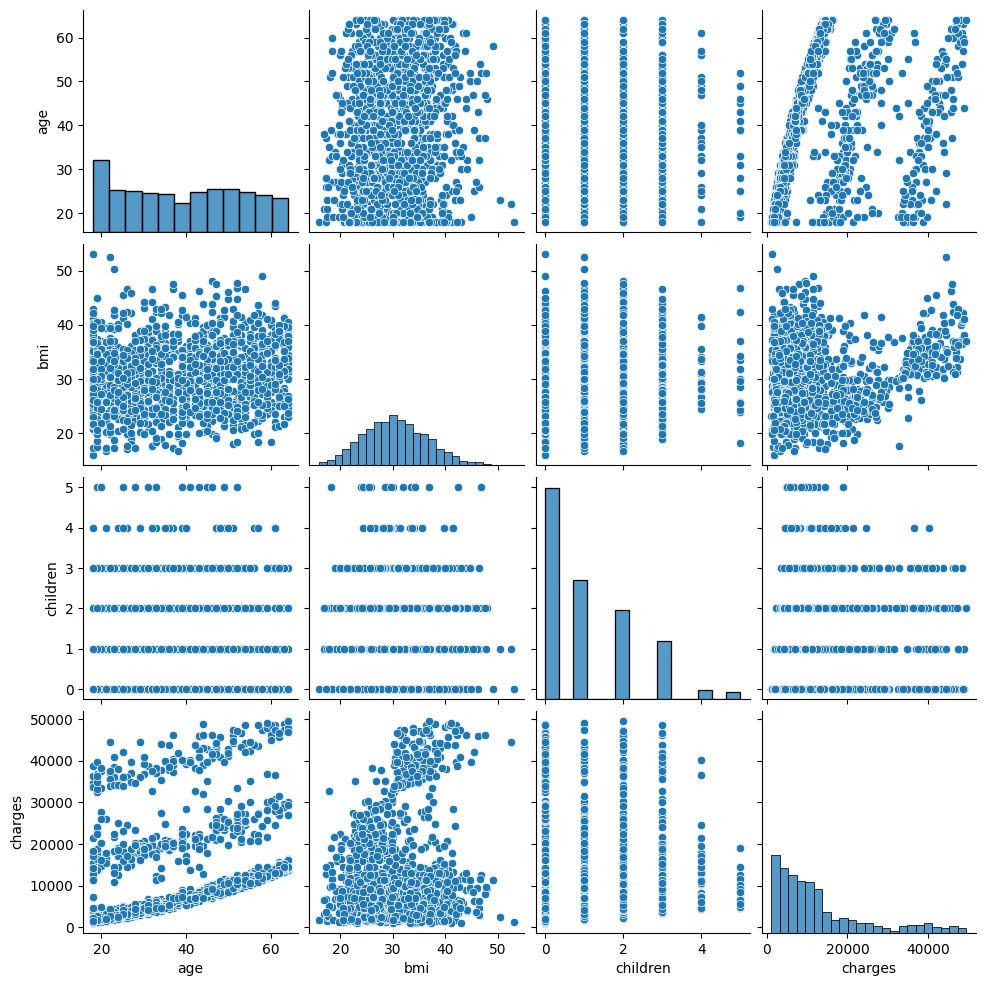

In [6]:
sns.pairplot(df,height=2.5)
plt.show()

Como dato relevante se puede observar como existen 3 grupos diferentes en el gráfico charges/age.

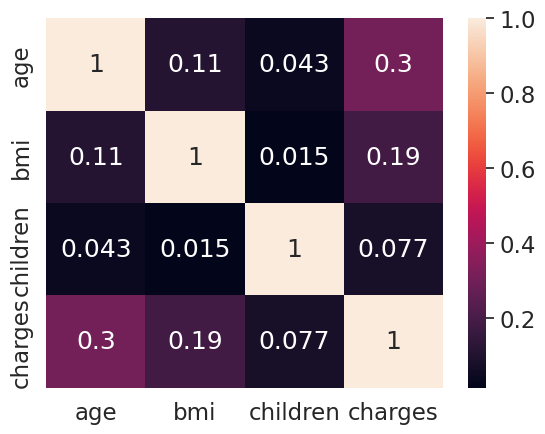

In [7]:
cols = ['age','bmi','children','charges']
df_corr= df[cols].corr()
sns.set(font_scale=1.5)
sns.heatmap(df_corr,annot=True,cbar=True)
plt.show()

### Convertimos las variables categóricas en variables numéricas y realizamos las correlaciones de todas las variables

In [8]:
df= pd.get_dummies(df,columns=['sex','smoker','region'],drop_first=True)

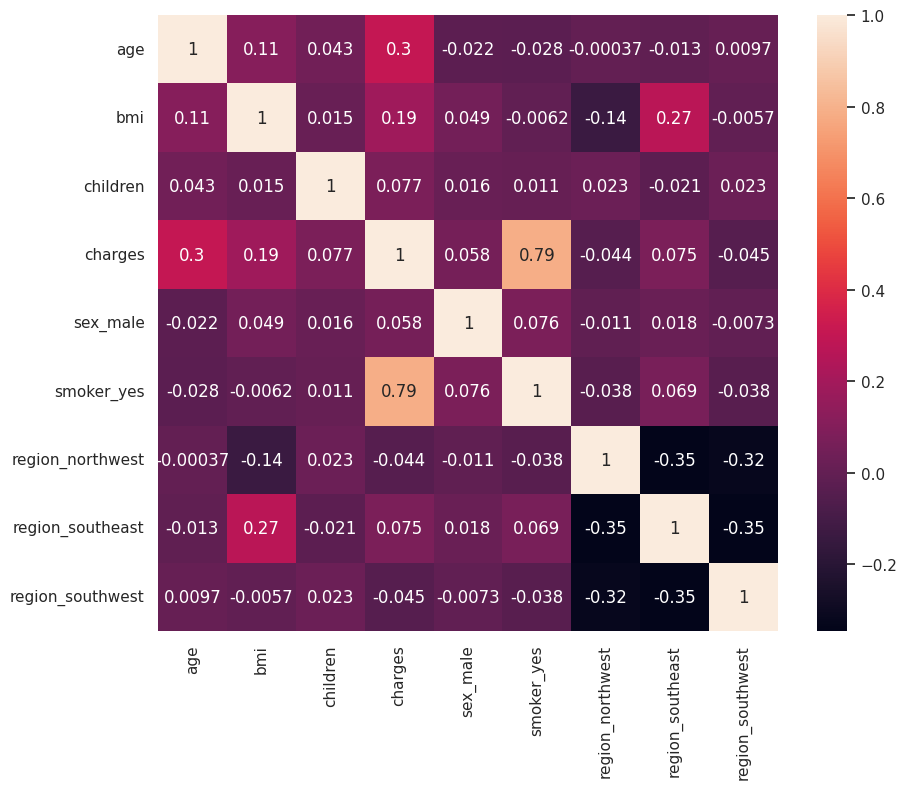

In [9]:
df_corr_cat= df.corr()
sns.set(font_scale= 1)
plt.figure(figsize = (10,8))
sns.heatmap(df_corr_cat,annot=True,cbar=True)
plt.show()

Existe una gran correlación entre las personas que fuman y los cargos.

### Creando el modelo de Regresión Lineal

Se creará un modelo de regresión lineal para conocer la relación entre los cargos y las demas variables.

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
#Se establecen las variables
X_cols = list(set(df.columns)-set(['charges']))
Y_cols = ['charges']

X = df[X_cols].values
Y = df[Y_cols].values
#Se prepara las variables de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(Y)

#Se crean los sets de datos
X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
Y_train = sc_y.transform(Y_train)
Y_test = sc_y.transform(Y_test)

#Se crea el modelo
model = LinearRegression()
model.fit(X_train,Y_train)
ypred = model.predict(X_test)

In [12]:
ypred.shape

(333, 1)

### Evaluando el modelo

In [13]:
import sklearn.metrics as metrics
!pip install setuptools==58

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 816.3/816.3 KB 61.3 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 58.1.0
    Uninstalling setuptools-58.1.0:
      Successfully uninstalled setuptools-58.1.0
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [14]:
#evaluando los valores reales contra los valores predichos.
mse = metrics.mean_squared_error(Y_test,ypred)
r2 = metrics.r2_score(Y_test,ypred)
print('r2:',r2.round(4))
print('mse:',mse.round(4))

r2: 0.7393
mse: 0.2517


La metrica R2(Coeficiente de determinación) mayor a 0.75 indica que es un buen modelo para predecir. Mas adelante intentaremos mejorarlo.
Y la metrica MSE (Error Cuadrático medio) para cada punto, calcula la diferencia cuadrada entre las predicciones y el objetivo y luego promedia esos valores.

In [15]:
!pip install regressors==0.0.3

  Using cached regressors-0.0.3.tar.gz (24 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 106.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 KB 47.4 MB/s eta 0:00:00
  Created wheel for regressors: filename=regressors-0.0.3-py2.py3-none-any.whl size=12590 sha256=dda4731dcdbb134fd4f3a20e63058b84b5cbdb7fdfc3d46fb82acf1cfa0fc171
  Stored in directory: /root/.cache/pip/wheels/c9/5a/a9/c70338832ecebeabf81897762da766a8cb64ad31e4a5542725
Successfully built regressors
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [16]:
from regressors import stats

In [17]:
#limpiamos los datos para que regressors interprete bien los valores
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [18]:
Y_test = Y_test.reshape(-1)
print('===============Summary===============')
stats.summary(model, X_test, Y_test, X_cols)

===============Summary===============
Residuals:
   Min      1Q  Median     3Q    Max
-2.092 -0.1073  0.1064 0.2645 0.9008


Coefficients:
                  Estimate  Std. Error  t value   p value
_intercept        0.003417    0.027851   0.1227  0.902423
age               0.301799    0.027497  10.9757  0.000000
region_southeast -0.053199    0.032882  -1.6179  0.106643
sex_male         -0.005124    0.027873  -0.1838  0.854268
smoker_yes        0.799294    0.028859  27.6962  0.000000
region_northwest -0.022273    0.032957  -0.6758  0.499622
children          0.048723    0.028124   1.7324  0.084124
region_southwest -0.043003    0.031559  -1.3626  0.173920
bmi               0.180023    0.027301   6.5940  0.000000
---
R-squared:  0.73926,    Adjusted R-squared:  0.73282
F-statistic: 114.83 on 8 features


Es importante observar que no exista una gran discrepancia entre R-squared y Adjusted R-squared, esto indica que no hay mucha diferencia al tener nuestras variables dentro del modelo.

### Residuales

Es importante notar que el residual es una simple resta entre los valores reales y los predichos. El resultado predicho estaría sobre la linea 0, pero los valores tienden a estar, valores arriba de este 0 y/o abajo de este. Entonces, no es una predicción perfecta de estos valores, sin embargo si se ve una tendencia cercana a ellos, por que no estan tan alejados de este mismo punto 0.

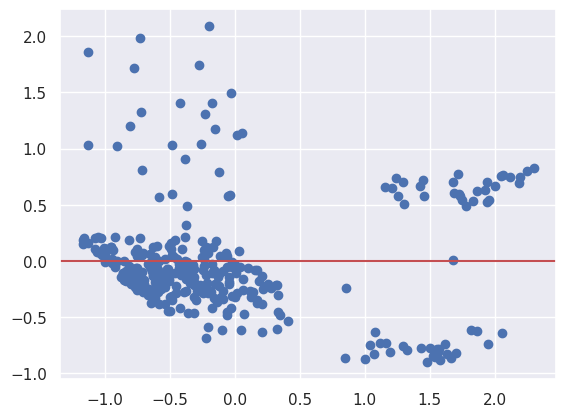

In [19]:
residual = np.subtract(Y_test, ypred.reshape(-1))
plt.scatter(ypred, residual)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

### Mejorando el modelo

Vamos a transformar alguna variables para poder mejorar el modelo.
Crearemos una copia 

In [20]:
df_second = df.copy()
df_second['age2'] = df_second.age**2
df_second['sobrepeso'] = (df_second.bmi >=30).astype(int)
df_second['sobrepeso*fumador'] = df_second.sobrepeso * df_second.smoker_yes 

In [21]:
X_cols = list(set(df_second.columns)-set(['charges']))
Y_cols = ['charges']

X = df_second[X_cols].values
Y = df_second[Y_cols].values
#Se prepara las variables de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(Y)

#Se crean los sets de datos
X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
Y_train = sc_y.transform(Y_train)
Y_test = sc_y.transform(Y_test)

#Se crea el modelo
model = LinearRegression()
model.fit(X_train,Y_train)
ypred = model.predict(X_test)

In [22]:
mse = metrics.mean_squared_error(Y_test,ypred)
r2 = metrics.r2_score(Y_test,ypred)
print('r2:',r2.round(4))
print('mse:',mse.round(4))

r2: 0.881
mse: 0.1184


In [23]:
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [24]:
Y_test = Y_test.reshape(-1)
print('===============Summary===============')
stats.summary(model, X_test, Y_test, X_cols)

===============Summary===============
Residuals:
   Min     1Q  Median     3Q    Max
-1.921 0.0628  0.1128 0.1525 1.4067


Coefficients:
                   Estimate  Std. Error  t value   p value
_intercept         0.005331    0.019008   0.2805  0.779290
sobrepeso*fumador  0.492686    0.027203  18.1115  0.000000
age               -0.097312    0.100226  -0.9709  0.332287
region_southeast  -0.033397    0.022821  -1.4634  0.144301
sex_male          -0.011739    0.019177  -0.6121  0.540859
smoker_yes         0.460721    0.027723  16.6188  0.000000
sobrepeso         -0.051852    0.029892  -1.7346  0.083731
age2               0.422175    0.098076   4.3046  0.000022
region_northwest  -0.008100    0.021994  -0.3683  0.712882
children           0.062452    0.019553   3.1940  0.001537
region_southwest  -0.046016    0.022752  -2.0225  0.043927
bmi                0.061319    0.028168   2.1769  0.030195
---
R-squared:  0.88096,    Adjusted R-squared:  0.87688
F-statistic: 215.96 on 11 features


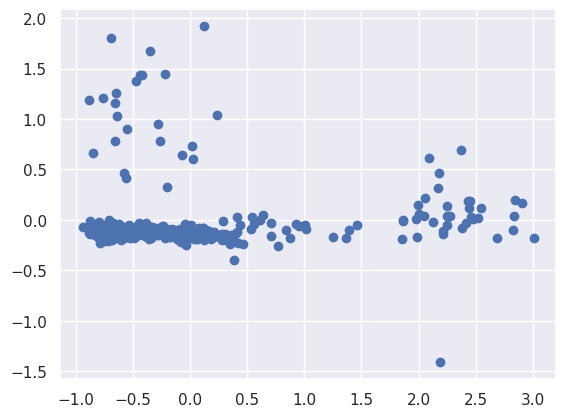

In [25]:
residual = np.subtract(Y_test, ypred.reshape(-1))
plt.scatter(ypred, residual)
plt.show()

### Mejorando el modelo mejorado 

Se procede a mejorar el modelo calculando los p values mayores a 0,05

In [26]:
X_cols = ['children','sobrepeso*fumador','smoker_yes','age2']
Y_cols = ['charges']

X = df_second[X_cols].values
Y = df_second[Y_cols].values
#Se prepara las variables de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(Y)

#Se crean los sets de datos
X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
Y_train = sc_y.transform(Y_train)
Y_test = sc_y.transform(Y_test)

#Se crea el modelo
model = LinearRegression()
model.fit(X_train,Y_train)
ypred = model.predict(X_test)

In [27]:
mse = metrics.mean_squared_error(Y_test,ypred)
r2 = metrics.r2_score(Y_test,ypred)
print('r2:',r2.round(4))
print('mse:',mse.round(4))

r2: 0.8812
mse: 0.1133


In [28]:
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [29]:
Y_test = Y_test.reshape(-1)
print('===============Summary===============')
stats.summary(model, X_test, Y_test, X_cols)

===============Summary===============
Residuals:
    Min    1Q  Median     3Q    Max
-2.0362 0.086  0.1241 0.1524 0.4674


Coefficients:
                   Estimate  Std. Error  t value   p value
_intercept         0.011270    0.018454   0.6107  0.541827
children           0.080283    0.018682   4.2974  0.000023
sobrepeso*fumador  0.486876    0.023110  21.0681  0.000000
smoker_yes         0.468351    0.023499  19.9306  0.000000
age2               0.325107    0.019224  16.9117  0.000000
---
R-squared:  0.88118,    Adjusted R-squared:  0.87974
F-statistic: 608.14 on 4 features


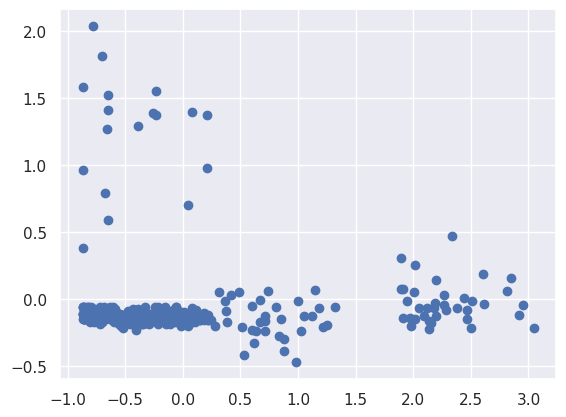

In [30]:
residual = np.subtract(Y_test, ypred.reshape(-1))
plt.scatter(ypred, residual)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0aafa7f7-02e1-48b0-bba7-37828aeb8cdb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>